# Importando base de dados

In [ ]:
import pandas as pd

In [73]:
pd.read_csv('tips.csv')

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [74]:
dados = pd.read_csv('tips.csv')

In [7]:
dados.head(5)

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


# Tradução

In [8]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [75]:
renomear = {
    'total_bill' : 'valor_da_conta'
    , 'tip' : 'gorjeta'
    , 'dessert' : 'sobremesa'
    , 'day' : 'dia_da_semana'
    , 'time' : 'hora_do_dia'
    , 'size' : 'total_de_pessoas'
}

In [12]:
type(dados)

pandas.core.frame.DataFrame

In [77]:
gorjetas = dados.rename(columns = renomear)

In [14]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [15]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [76]:
sim_nao = {
    'No' : 'Não'
    , 'Yes' : 'Sim'
}

In [78]:
gorjetas.sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [35]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


In [79]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [22]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2


In [23]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [80]:
dias = {
    'Sun' : 'Domingo'
    , 'Sat' : 'Sábado'
    , 'Thur' : 'Quinta'
    , 'Fri' : 'Sexta'
}

In [81]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [34]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


In [29]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [82]:
hora = {
    'Dinner' : 'Jantar'
    , 'Lunch' : 'Almoço'
}

In [83]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)

In [33]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


# Importando o Seaborn

In [37]:
!pip install seaborn==0.9.0

     |████████████████████████████████| 215kB 11.0MB/s 
  Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
      Successfully uninstalled seaborn-0.11.1


In [38]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [39]:
!pip show seaborn

Name: seaborn
Version: 0.9.0
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: /usr/local/lib/python3.7/dist-packages
Requires: scipy, pandas, matplotlib, numpy
Required-by: missingno


# Análise 1- Valor da conta e gorjeta

In [42]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

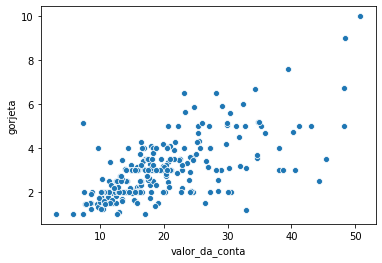

In [44]:
valor_gorjeta = sns.scatterplot(x = 'valor_da_conta', y = 'gorjeta', data = gorjetas)

**Visualmente, o valor da gorjeta aumenta conforme aumenta o valor da conta**

In [47]:
print('A base de dados contém {} registros\n'.format(gorjetas.shape[0]))
print('Registros não nulos')
gorjetas.count()

A base de dados contém 244 registros

Registros não nulos


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

## Criando o campo porcentagem

In [48]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


In [85]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_da_conta']

In [51]:
gorjetas.head(5)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542
2,21.01,3.50,Não,Domingo,Jantar,3,0.166587
3,23.68,3.31,Não,Domingo,Jantar,2,0.139780
4,24.59,3.61,Não,Domingo,Jantar,4,0.146808


In [86]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [54]:
gorjetas.head(5)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


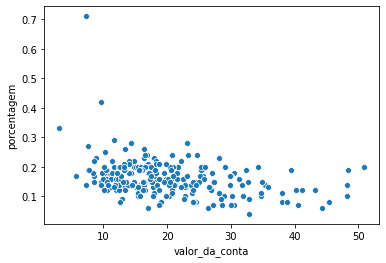

In [55]:
porcentagem_conta = sns.scatterplot(x = 'valor_da_conta', y = 'porcentagem', data = gorjetas)

**Visualmente, o valor da conta não é proporcional ao valor da gorjeta**

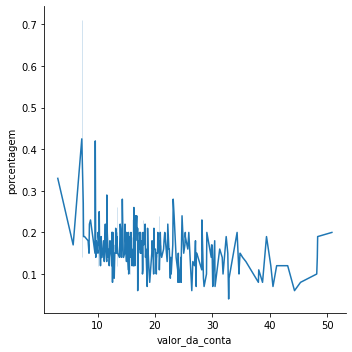

In [57]:
porcentagem_conta_linha = sns.relplot(x = 'valor_da_conta', y = 'porcentagem', kind = 'line', data = gorjetas)

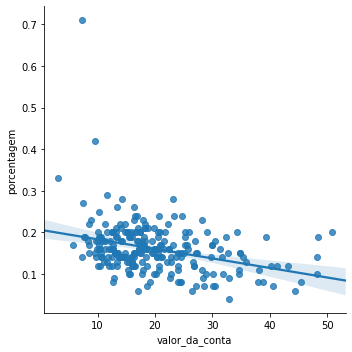

In [58]:
sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', data = gorjetas)

## Editando um Gráfico

In [59]:
porcentagem_conta.figure.suptitle('Relação Gorjeta x Valor da Conta')

Text(0.5, 0.98, 'Relação Gorjeta x Valor da Conta')

In [61]:
porcentagem_conta.set_title('Análise do valor da gorjeta em relação ao valor da conta')

Text(0.5, 1.0, 'Análise do valor da gorjeta em relação ao valor da conta')

In [63]:
porcentagem_conta.set(xlabel = 'Valor da conta', ylabel = 'Valor da gorjeta')

[Text(17.200000000000003, 0.5, 'Valor da gorjeta'),
 Text(0.5, 18.106250000000003, 'Valor da conta')]

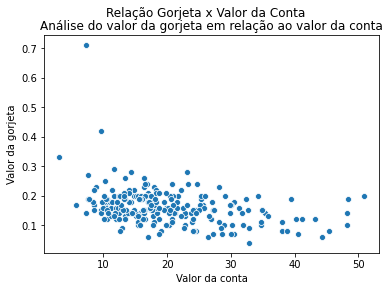

In [64]:
porcentagem_conta.get_figure()

In [ ]:
## salvando imagem (Ex.)
imagem = porcentagem_conta.get_figure()
imagem.savefig('imagem.png')

# Análise 2 - Sobremesa

In [65]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06


In [67]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [87]:
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


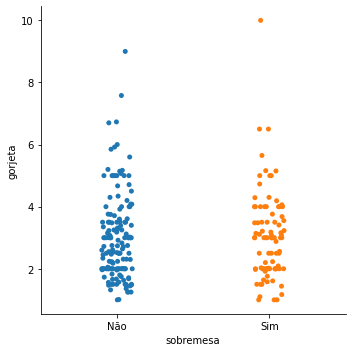

In [89]:
sns.catplot(x = 'sobremesa', y = 'gorjeta', data = gorjetas)

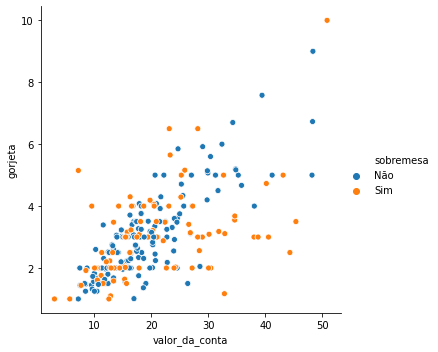

In [91]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'sobremesa', data = gorjetas)

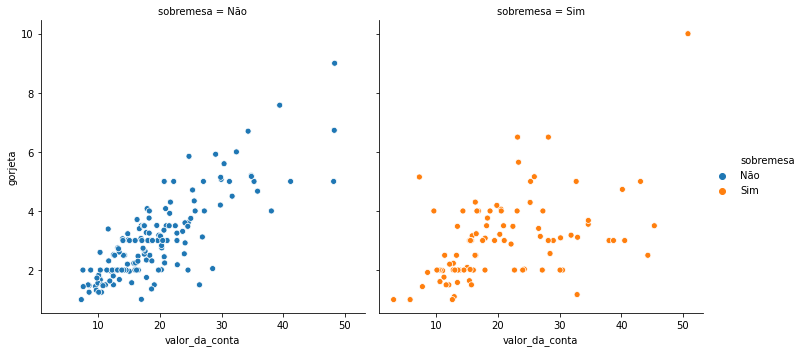

In [92]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'sobremesa', col = 'sobremesa', data = gorjetas)

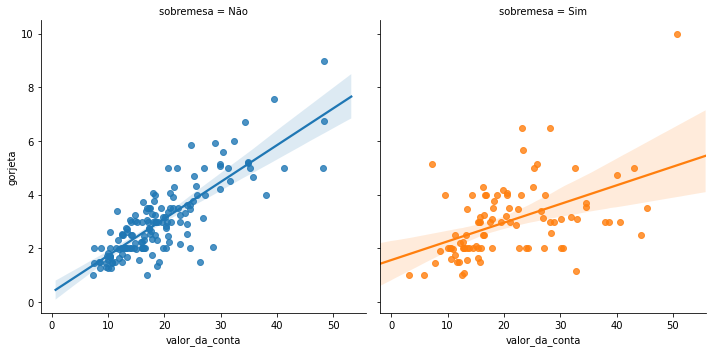

In [93]:
sns.lmplot(x = 'valor_da_conta', y = 'gorjeta', col = 'sobremesa',hue = 'sobremesa', data = gorjetas)

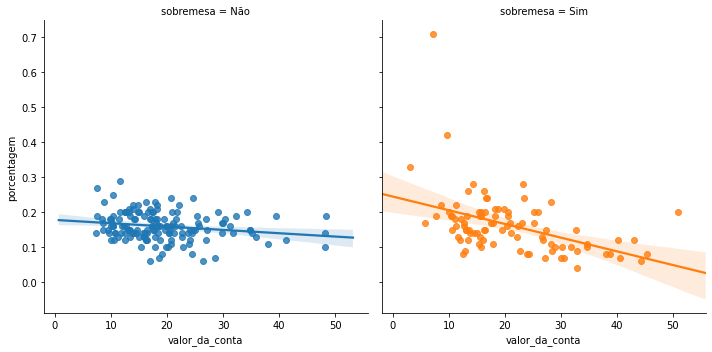

In [94]:
sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', col = 'sobremesa',hue = 'sobremesa', data = gorjetas)

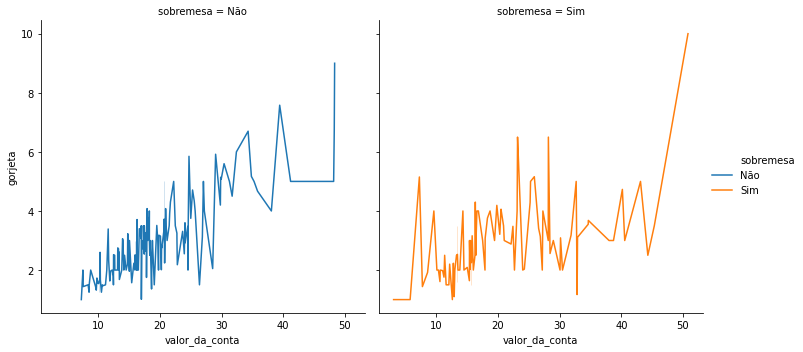

In [96]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'sobremesa', col = 'sobremesa', kind = 'line', data = gorjetas)

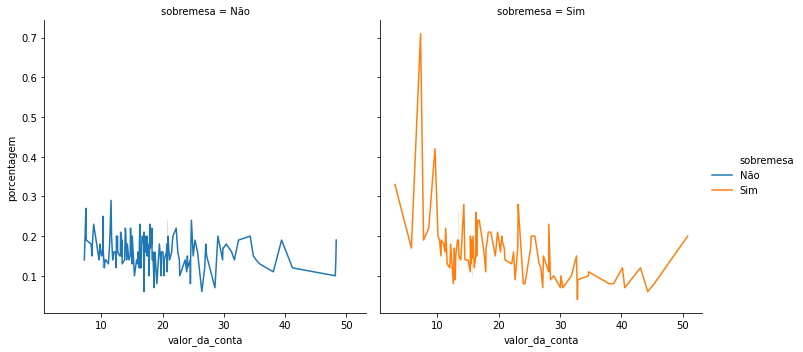

In [97]:
sns.relplot(x = 'valor_da_conta', y = 'porcentagem', hue = 'sobremesa', col = 'sobremesa', kind = 'line', data = gorjetas)

**Visualmente, existe uma diferença no valor da gorjeta daqueles que pediram sobremesa e não pediram sobremesa.**

## Teste de hipótese

**H<sup>null</sup>**
**A distribuição da taxa da gorjeta é a mesma nos dois grupos**

**H<sup>alt</sup>**
**A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

In [98]:
from scipy.stats import ranksums

In [104]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem

In [105]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [107]:
r = ranksums(sobremesa, sem_sobremesa)

In [108]:
print('O valor do p-value é {}'.format(r.pvalue))

O valor do p-value é 0.5266635660124415


**H<sup>null</sup>**
**A distribuição da taxa da gorjeta é a mesma nos dois grupos**

# Análise 3 - Dia da semana

In [110]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

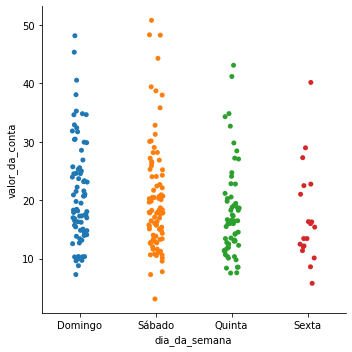

In [112]:
sns.catplot(x = 'dia_da_semana', y = 'valor_da_conta', data = gorjetas)

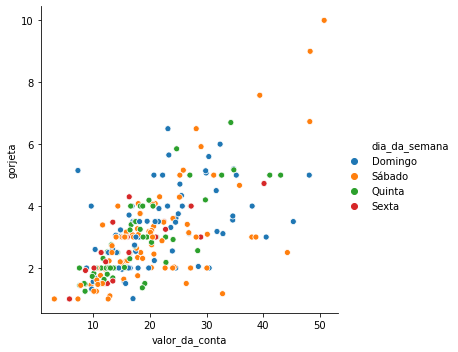

In [113]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'dia_da_semana', data = gorjetas)

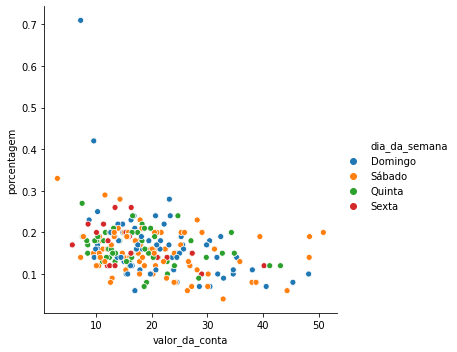

In [114]:
sns.relplot(x = 'valor_da_conta', y = 'porcentagem', hue = 'dia_da_semana', data = gorjetas)

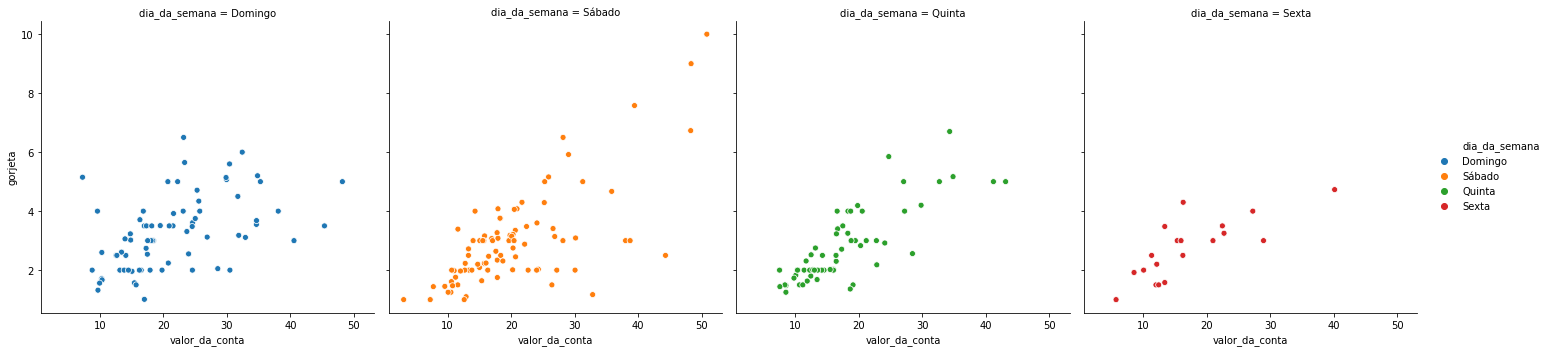

In [115]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'dia_da_semana', col = 'dia_da_semana', data = gorjetas)

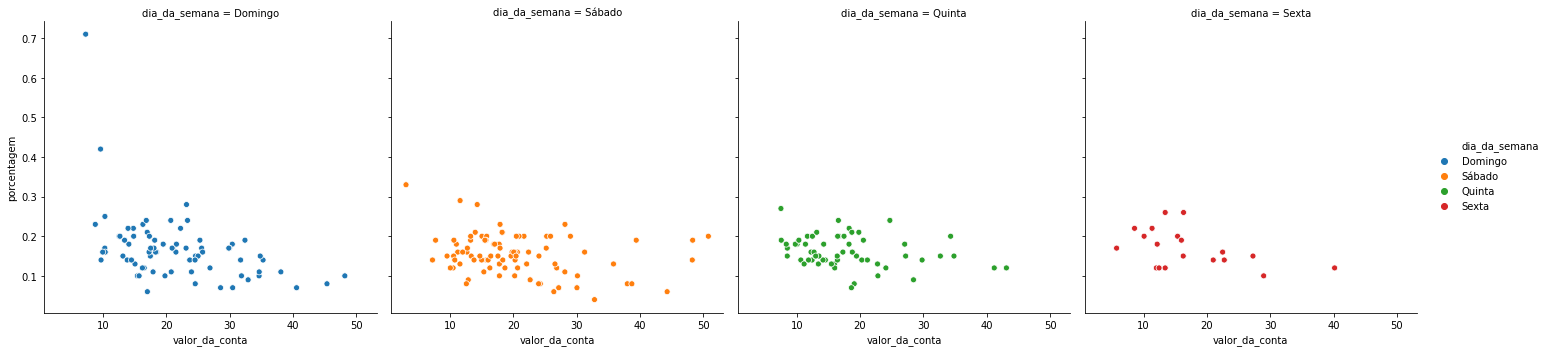

In [116]:
sns.relplot(x = 'valor_da_conta', y = 'porcentagem', hue = 'dia_da_semana', col = 'dia_da_semana', data = gorjetas)

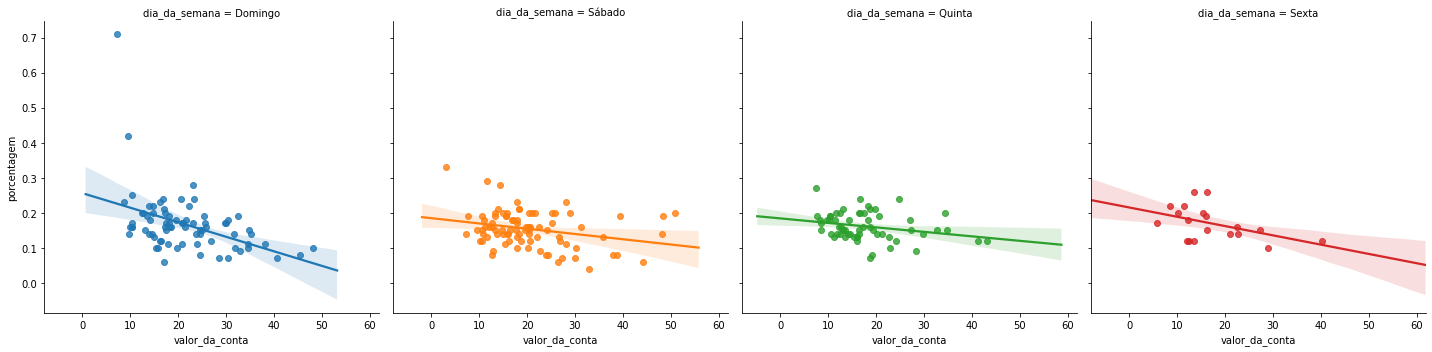

In [117]:
sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', hue = 'dia_da_semana', col = 'dia_da_semana', data = gorjetas)

In [119]:
media_geral_gorjetas = gorjetas.gorjeta.mean()

In [120]:
print('A média geral das gorjetas é de: {}'.format(media_geral_gorjetas))

A média geral das gorjetas é de: 2.9982786885245902


In [123]:
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [125]:
print('Frequência dos dias')
gorjetas.dia_da_semana.value_counts()

Frequência dos dias


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

## Teste de hipótese

**H<sup>null</sup>**
**A distribuição do valor da conta é igual no sábado e no domingo**

**H<sup>alt</sup>**
**A distribuição do valor da conta não é igual no sábado e no domingo**

In [128]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta

In [131]:
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'").valor_da_conta

In [133]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)
print('O valor do p-value é {}'.format(r2.pvalue))

O valor do p-value é 0.3576728477868443


**H<sup>null</sup>**
**A distribuição do valor da conta é igual no sábado e no domingo**

# Análise 4 - Hora do dia

In [134]:
gorjetas.head(5)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [135]:
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

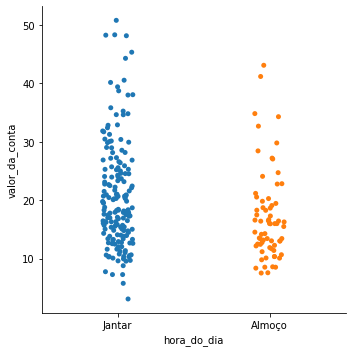

In [136]:
sns.catplot(x = 'hora_do_dia', y = 'valor_da_conta', data = gorjetas)

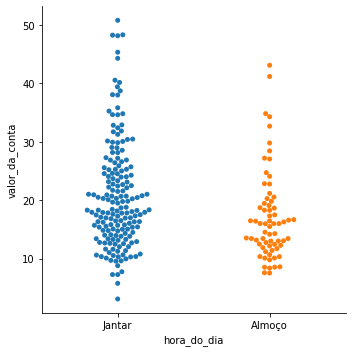

In [137]:
sns.catplot(x = 'hora_do_dia', y = 'valor_da_conta', kind = 'swarm', data = gorjetas)

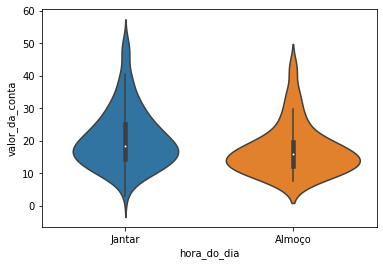

In [138]:
sns.violinplot(x = 'hora_do_dia', y = 'valor_da_conta', data = gorjetas)

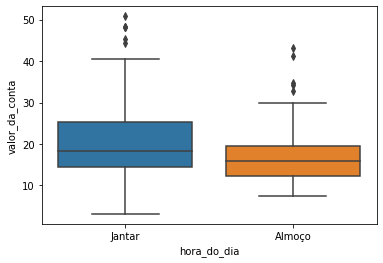

In [139]:
sns.boxplot(x = 'hora_do_dia', y = 'valor_da_conta', data = gorjetas)

In [141]:
almoco = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta

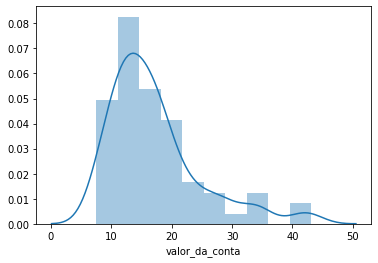

In [143]:
sns.distplot(almoco) ## in a new version of seaborn, this is known as displot

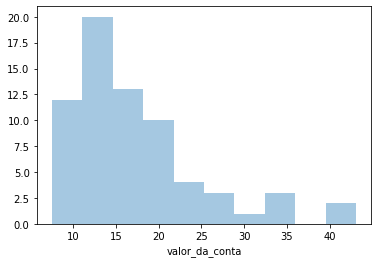

In [144]:
sns.distplot(almoco, kde = False)

In [145]:
jantar = gorjetas.query("hora_do_dia == 'Jantar'").valor_da_conta

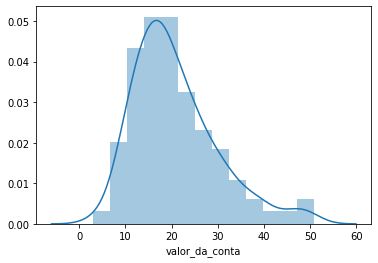

In [149]:
sns.distplot(jantar)

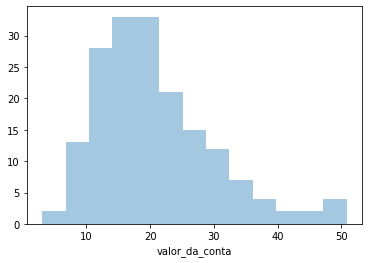

In [148]:
sns.distplot(jantar, kde = False)

In [152]:
gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


## Teste de hipótese

**H<sup>null</sup>**
**A distribuição do valor da conta é igual no jantar e no almoço**

**H<sup>alt</sup>**
**A distribuição do valor da conta não é igual no jantar e no almoço**

In [155]:
r3 = ranksums(jantar, almoco)

In [157]:
print('O valor do p-value é de {}.'.format(r3.pvalue))

O valor do p-value é de 0.0011791039723641672.


**H<sup>alt</sup>**
**A distribuição do valor da conta não é igual no jantar e no almoço**

## Teste de hipótese 2

**H<sup>null</sup>**
**A distribuição da taxa da conta é igual no jantar e no almoço**

**H<sup>alt</sup>**
**A distribuição da taxa da conta não é igual no jantar e no almoço**

In [163]:
porcentagem_almoco = gorjetas.query("hora_do_dia == 'Almoço'").porcentagem

In [164]:
porcentagem_jantar = gorjetas.query("hora_do_dia == 'Jantar'").porcentagem

In [166]:
r4 = ranksums(porcentagem_almoco, porcentagem_jantar)

In [167]:
print('O valor do p-value é de: {}'.format(r4.pvalue))

O valor do p-value é de: 0.2602493995587126


**H<sup>null</sup>**
**A distribuição da taxa da conta é igual no jantar e no almoço**